##### Exploratory data analysis

In [10]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Data source: https://www.kaggle.com/datasets/luvharishkhati/heart-disease-patients-details/data
df = pd.read_csv('heart_disease.csv')

In [12]:
# viewing the first few rows of the data
df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,result
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


Data dictionary


| Variable                             | Definition                                             |
| -------------------------------------|--------------------------------------------------------|
| Age                                  | Age of patient
| Sex                                  | Sex of patient, 0 = female, 1 = male
| Chest                                | Chest pain type 1: asymptomatic 2: atypical angina 3: non-anginal pain 4: typical angina (*1)                                
| resting_blood_pressure               | Resting systolic blood pressure (Normal is ~120-129)
| serum_cholestoral                    | Ammount of cholestoral in blood
| fasting_blood_sugar                  | Blood sugar after overnight fast > 120 mg/dl, 1 = true, 0 = false (*2)
| resting_electrocardiographic_results | EKG results at rest 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) (*3)
| maximum_heart_rate_achieved          | Maximum heart rate acheived under stress (*4)
| exercise_induced_angina              | Pain in the chest during exersize, 0 = absent, 1 = present
| oldpeak                              | Depression in ST segment compared to rest as portion of 1 (full height), e.g. 0.8
| slope                                | The slope of the peak exercise ST segment 1: downsloping; 2: flat; 3: upsloping (*5)
| number_of_major_vessels              | Number of major vessles colored by flourosopy (*6)
| thal                                 | A blood disorder called thalassemia, 3 = normal; 6 = fixed defect; 7 = reversable defect (*7)
| result                               | Presence of heart disease, 0 = absent, 1 = present


The explanation of the meanings of the data from the source is lack luster. Some explanations given are blantantly incorrect. More important clarifications are given here. This is examined more in depth later in discussion of data adjustments.

Clarifications from 

https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7
https://www.cdc.gov/diabetes/basics/getting-tested.html
https://www.niddk.nih.gov/health-information/diabetes/overview/preventing-problems/heart-disease-stroke
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9931474/


(*1): This had to be researched. My interpretation seems to be correct based on the source I found, though their values start from 0.

(*2): This also had to be researched from the first link. The next two links provide the aditional context:

"A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes." While high blood glucose resulting from diabetes can overtime damage your heart leading to heat disease, diabetes itself is NOT heart disease.

(*3): Gleaned from the first link as an insufficient description is given with the data. Potentially an issue that NO patients scored 0, normal.

(*4): The data asserts that maximum heart rate = 220 - age, then gives someone who is 29 a max heart rate of 202. Basic math tells us that 220 - 29 = 191. I assume 220 - age is just an estimate and maximum_heart_rate_achieved is the maximum heart rate measured in the patient. This value is usually found by having the patient exersize on a treadmill or when not possible, elevating heart rate using medications.

(*5): This had to be researched. My interpretation seems to be correct based on the source I found, though their values start from 0.

(*6): This had to be researched. My interpretation seems to be correct based on the source I found, though their values start from 0.

(*7): This had to be researched. My interpretation seems to be correct based on the source I found. 3, 6, 7 are the only values possible it seems.


In [13]:
# what's the data size?
df.shape

(270, 14)

In [15]:
df.isna().sum()

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
result                                  0
dtype: int64

The data is clean! Nothing is missing.

In [16]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest                                 270 non-null    int64  
 3   resting_blood_pressure                270 non-null    int64  
 4   serum_cholestoral                     270 non-null    int64  
 5   fasting_blood_sugar                   270 non-null    int64  
 6   resting_electrocardiographic_results  270 non-null    int64  
 7   maximum_heart_rate_achieved           270 non-null    int64  
 8   exercise_induced_angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope                                 270 non-null    int64  
 11  number_of_major_ves

In [17]:
# statistics of the dataset (numeric columns)
df.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,result
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


Some of this is meaningless, for example, we don't care what the mean of thal is since it only take on values 3,6,7.

In [21]:
# is the data imbalanced?
df.result.value_counts(normalize=True) #normalizes the result

result
0    0.555556
1    0.444444
Name: proportion, dtype: float64

#### Pairplot

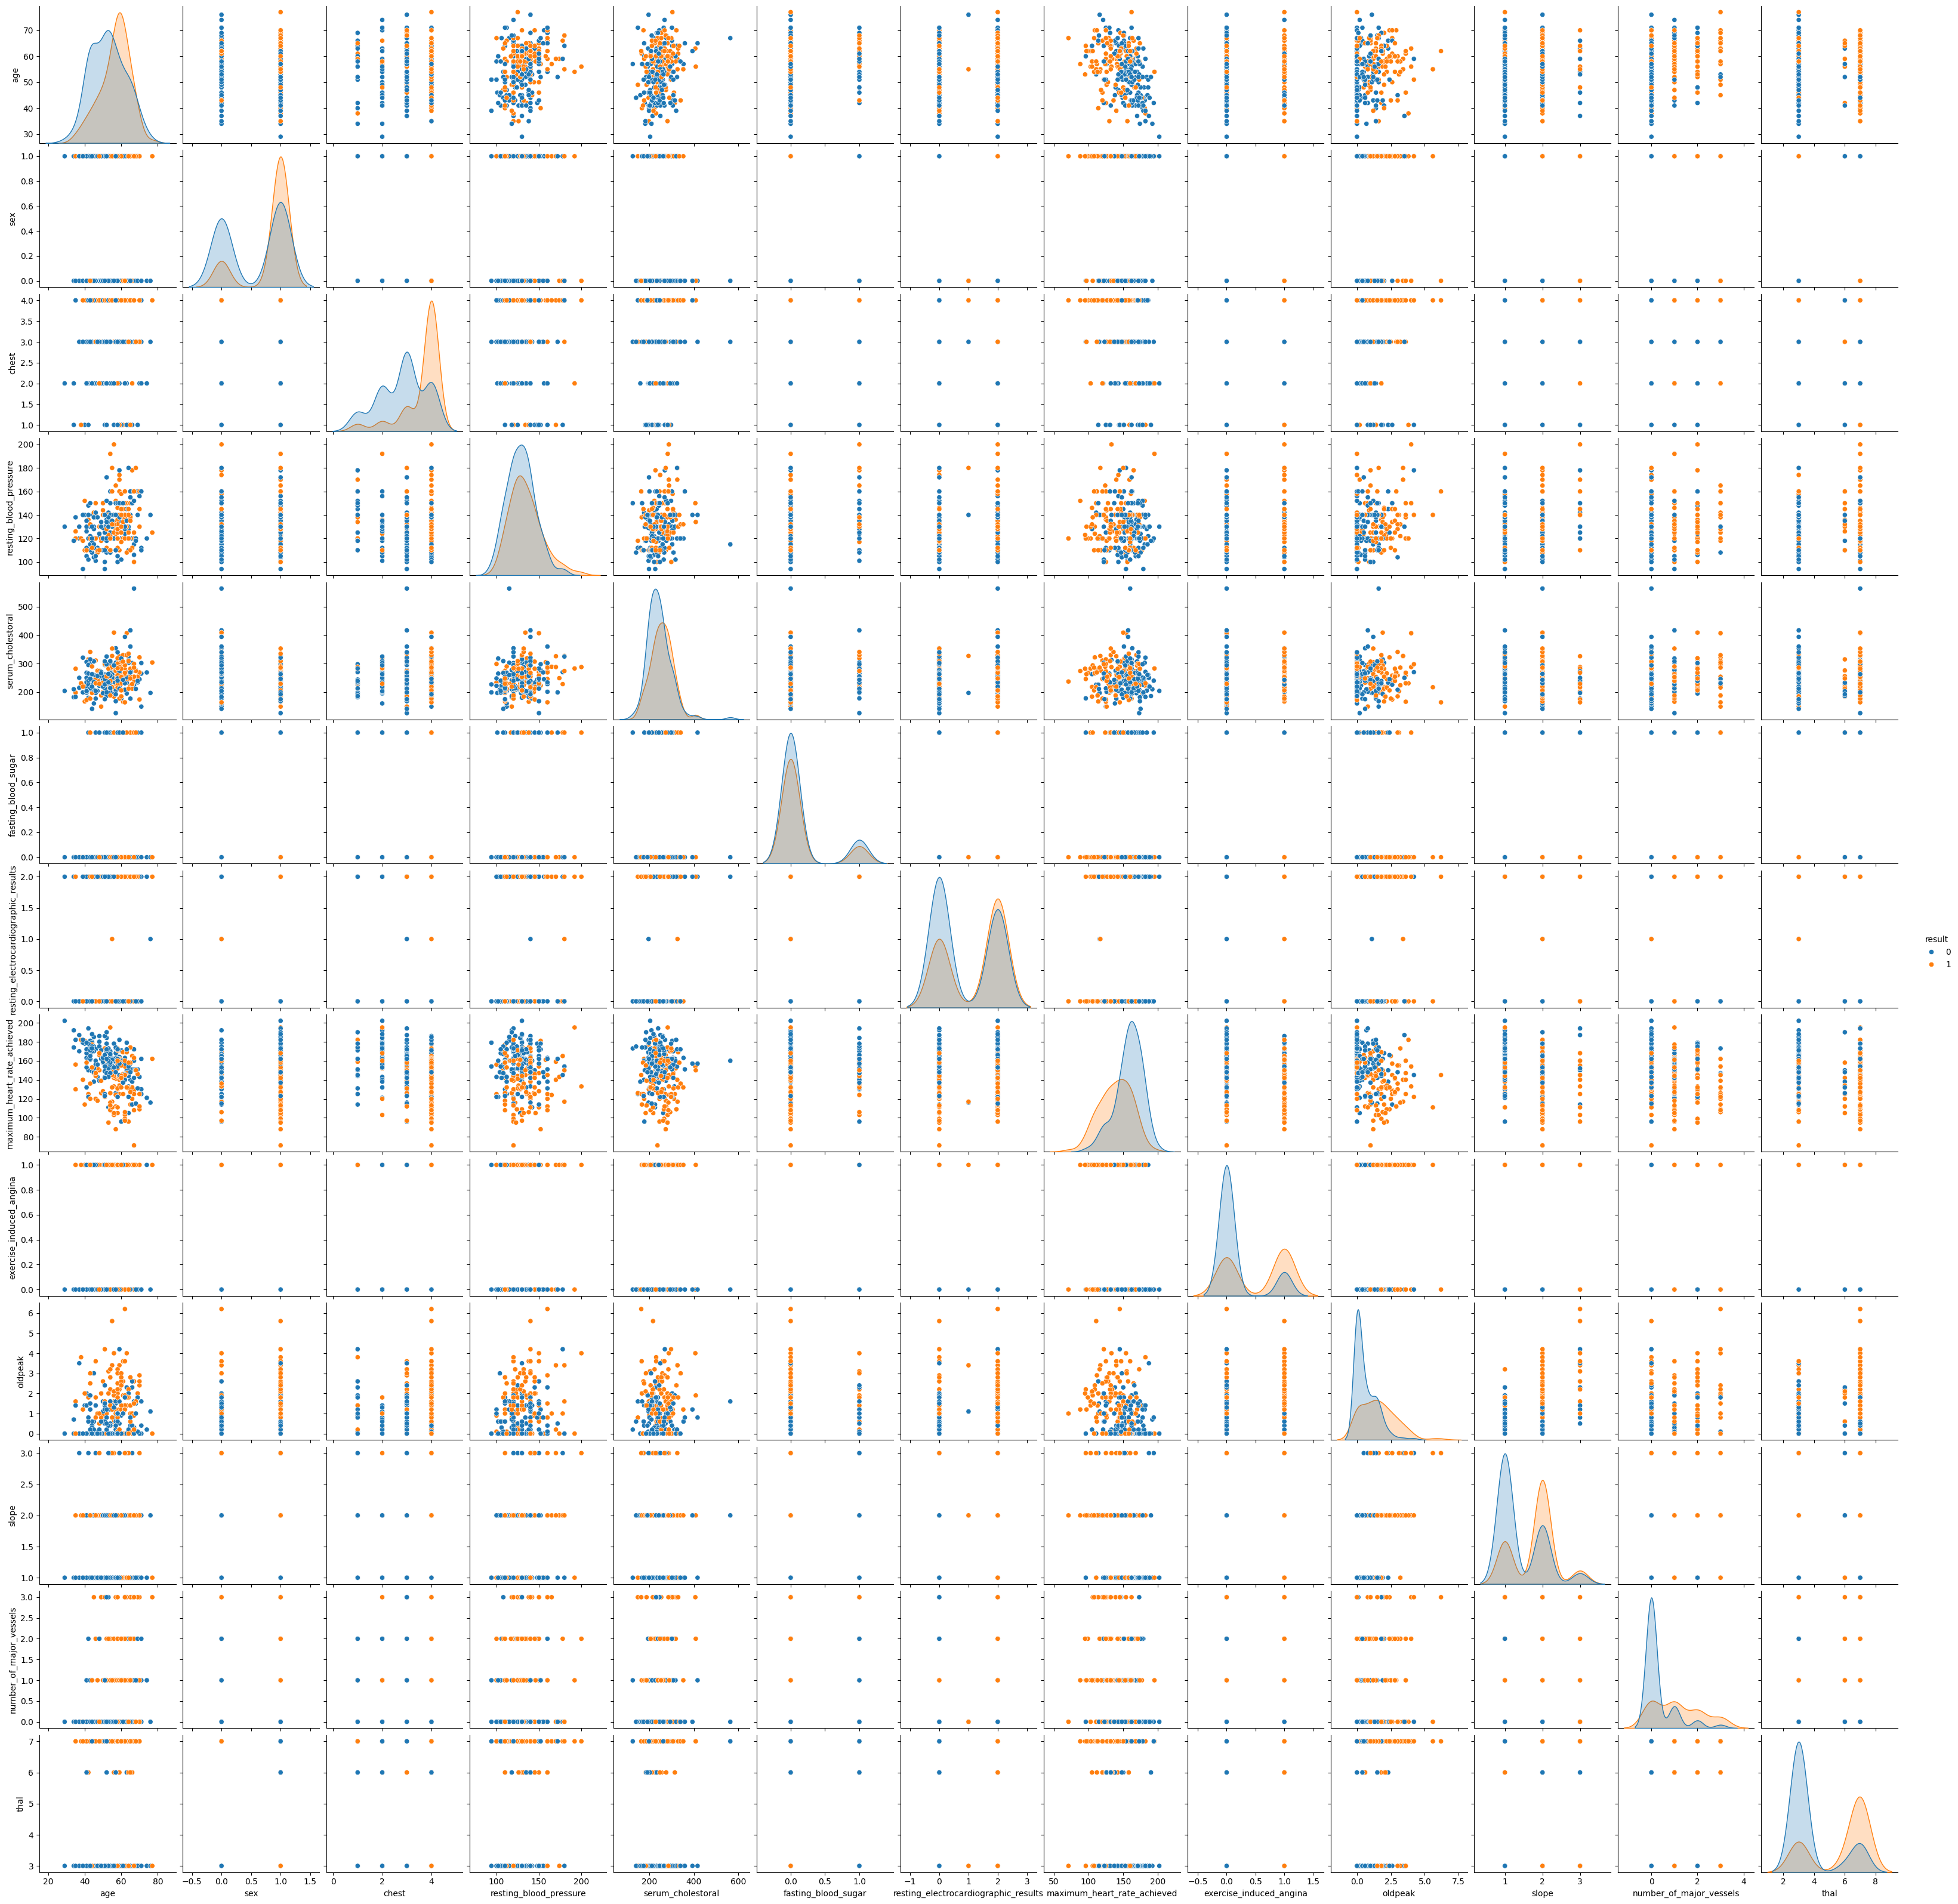

In [22]:
# Ploting pairwise relationships in the dataset
# This takes a while since there is so much data...

sns.pairplot(df, hue='result')

While the quantized graphs being groups of lines look a little awkward, they do a great job of showing how two factors correlate to a positive result. For example, look at oldpeak and thal. From the graph we can see that a high oldpeak correlates strongly with a positive result. With high thal however, this threshold is even lower.

We can also see correlations from individual data columns based on looking at each of their graphs. For example, lower maximum heart rate seems to correlate with a positive result. Consider that this may be a correlation caused by age however! Intuitively we can see why that would be and looking at the data does visually back up that this could potentially be the case.

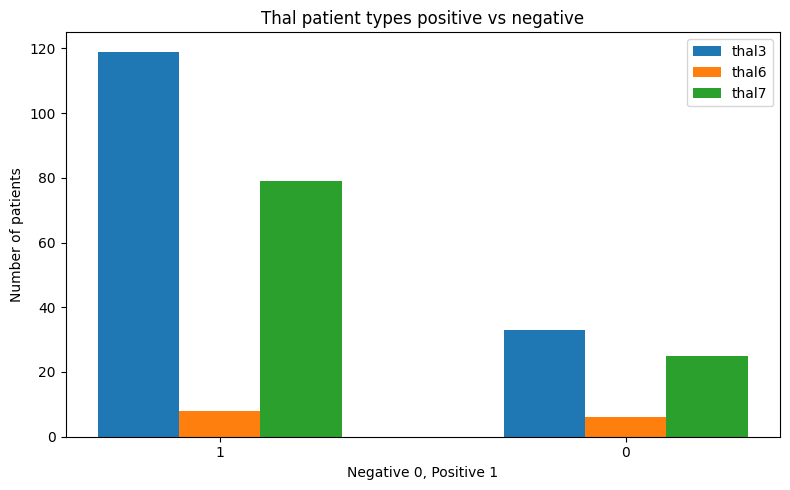

In [42]:
# Because many of these values are quantized, it is more useful to visualize them
# with a graph other than a scatter plot. For example, thal.


labels = df.result.value_counts().index
thal3 = df.loc[df.thal==3].result.value_counts()
thal6 = df.loc[df.thal==6].result.value_counts()
thal7 = df.loc[df.thal==7].result.value_counts()

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width, thal3, width, label='thal3')
rects2 = ax.bar(x, thal6, width, label='thal6')
rects3 = ax.bar(x + width, thal7, width, label='thal7')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Negative 0, Positive 1')
ax.set_ylabel('Number of patients')
ax.set_title('Thal patient types positive vs negative')
ax.set_xticks([1,0])
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

In [46]:
thal7 = df[(df['thal'] == 7)].shape[0]
thal7_neg = df[(df['thal'] == 7) & (df['result'] == 0)].shape[0] # negative thal7
thal7_pos = df[(df['thal'] == 7) & (df['result'] == 1)].shape[0] # positive thal7
print("Thal = 7 and positive: ", thal7_pos)
print("Thal = 7 and negative: ", thal7_neg)
print("Proportion of (thal = 7 & positive) / (thal = 7): ", format(thal7_pos/thal7, ".2f"))
print("Proportion of (thal = 7 & negative) / (thal = 7): ", format(thal7_neg / thal7, ".2f"))

Thal = 7 and positive:  79
Thal = 7 and negative:  25
Proportion of (thal = 7 & positive) / (thal = 7):  0.76
Proportion of (thal = 7 & negative) / (thal = 7):  0.24


We can see trends in this chart that may indicate corelation. For example, if your thal = 3, you're much more likely to not have heart disease. Other useful trends can be easily established using the same method.

Note: Visualizing data in both ways is a good idea! Its a lot easier to view and understand data in various formats

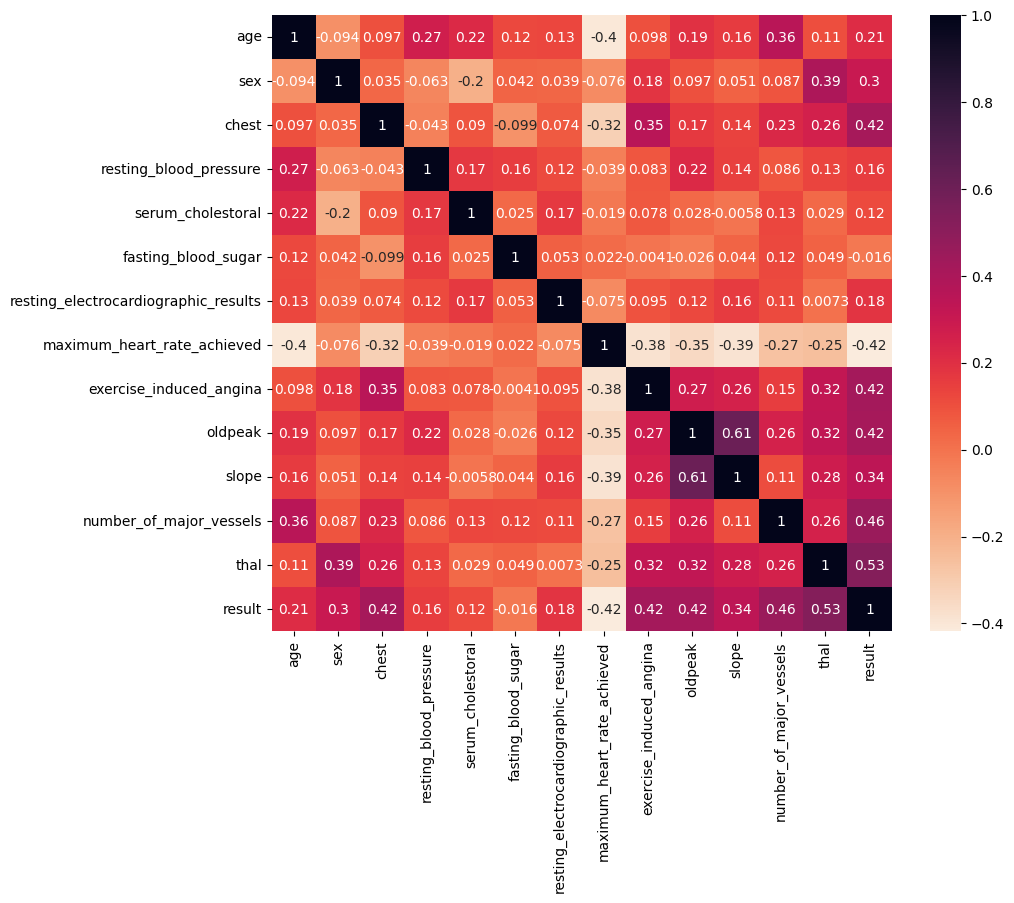

In [54]:
# How to features correlate with each other?

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r')
plt.show()

Okay, so what does visualizing the data in this way actually tell us? 

Immediately it becomes obvious which measurements more directly respond to a positive result. This can give us an idea if there is actually a relation between our data and the result. If there isn't, there isn't really a point in training a model from the data.

For the purposes of filling in blanks in the data, correlations are really helpful. We can spot these correlations using this visualization technique. Since age and maximum heart rate correlate more strongly, if we are missing data from one of these collums, we can use the other to help inform what we should put in this missing space. More on this later.

##### Normalization of data

Luckily, the data set that I am using doesn't have any missing data so there isn't anything that needs doing. That feels like a cop-out though, so what are some strategies to address missing data in the future?


Using the mean of other datapoints to fill in missing data can create bias. It generally should only be used when there are a significant number of non-missing data points as a proportion of the total data points in the column. Having enough data available is important because you must be able to show that the data follows a normal distribution. Adressing outliers is an important part of this, if you have one data point that is way larger than all the others, the mean will likely be *mean*ingless. Ba dum tish.

Further, taking the mean isn't usually the best way to go about filling in data if you can extrapolate values in a more informed way. Say that we were missing some values from maximum heart rate. Recall my earlier takedown of maximum heart rate being calculated as 220 - age. While this wasn't perfectly accurate, looking at the visualized data from earlier, there is a clear trend! Knowing that age does effect maximum heart rate, we can establish a relation between the two and use that to inform missing data points in maximum heart rate. This will give us MUCH more accurate data than just mindlessly plugging in the mean. (If age was also missing, dropping that row might be the best move.)

Using the mean is also bad in cases where the datapoint is limited to certain values. Recall that thal is limited to be only 3, 6, or 7. Taking the average of these three will more than likely give us a nonsense value that doesn't corespond to a measured result and doesn't help us at all. So, if we were missing a sufficiently small number of thal values, taking the mode would be our best bet.

Each of these cases have mentioned potential solutions to fill in missing data that represents a small portion of the column. So what do we do when a large portion of the column is missing? Drop the column. Unless we can establish a very strong correlation and justification between the column's data and the result, there really is no good reason to risk muddying the water with random guesswork.
